# Jamar Sanders DSC 520: Linear Regression Topic 3: Survival Analysis in R

Do patients with pericardial effusion have a significantly different survival time compared to patients without pericardial effusion?

Let:
T represent the survival time of a patient. PE represent the presence of pericardial effusion (1 for present, 0 for absent). S(t|PE) represent the
survival function (probability of surviving beyond time t) for a given value of PE. Then the hypotheses can be expressed mathematically as:
H0: S(t|PE=1) = S(t|PE=0) for all t H1: S(t|PE=1) ≠ S(t|PE=0) for some t
Null Hypothesis (H0): The presence of pericardial effusion does not affect survival time. Alternative Hypothesis (H1): The presence of
pericardial effusion does affect survival time.

 # Load Data

The echocardiogram dataset consists of 131 observations and 14 variables, providing clinical and echocardiographic data on heart attack patients. Key variables include survival time (in months), age at heart attack, and echocardiographic measurements such as fractional shortening, E-point septal separation (EPSS), and left ventricular diastolic dimension (LVDD), which indicate cardiac function. The dataset also records whether the patient had a pericardial effusion (fluid around the heart) and wall motion scores, which assess heart wall movement. Notably, many variables are stored as character (chr) types instead of numeric, which could lead to computational issues and may require conversion before analysis. Additionally, the "name" column appears redundant, and the "NA_column" contains missing or unnecessary data. Cleaning the dataset by converting numerical variables to appropriate data types, handling missing values, and removing unnecessary columns will be essential for further statistical analysis or predictive modeling.

In [ ]:
# Load necessary libraries
> library(dplyr)
knitr)

# Load my dataset
file_path <- "/workspa> library(knitr)
ram.csv"
echocardiogram_data <- read.csv(file_path>
> # Load my dataset
> file_path <- "/workspaces/Survival_Analysis/echocardiogram - echocardiogram.csv"
a
print(head(echocardiogram_data))

# Rename the c> echocardiogram_data <- read.csv(file_path)
columns with more meaningful names
colnames(echocardiogram_data) <- c("survival_time", "status", "age>
 # Check dataset structure
  str(echocardiogram_data)


> # Print the first few rows to check the raw data
> print(head(echocardiogram_data))
_at_heart_attack",
                                X11 X0 X71 X0.1 X0.26     X9  X4.6  X14    X1  X1.1 name X1.2 X0.2 X
1  19  0  72    0  0.38      6   4.1   14   1.7 0.588 name    1    0  
2  16  0  55    0  0.26      4  3.42   14     1     1 name    1    0  
3  57  0  60    0 0.253 12.062 4.603   16  1.45 0.788 name    1    0  
4  19  1  57    0  0.16     22  5.75   18  2.25 0.571 name    1    0  
5  26  0  68    0  0.26      5  4.31   12     1 0.857 name    1    0  
6  13  0  62    0  0.23     31  5.43 22.5 1.875 0.857 name    1    0  
     "pericardial_effusion", "fractional_shortening",
                                   "epss", "lvdd", "wall_motion_score",
                      >
> # Rename the columns with more meaningful names
> colnames(echocardiogram_data) <- c("survival_time", "status", "age_at_heart_attack",
+                                    "pericardial_effusion", "fractional_shortening",
+                                    "epss", "lvdd", "wall_motion_score",
+                                    "wall_motion_index", "mult", "name",
+                                    "group", "alive_at_1_year", "NA_column")
were renamed correctly
print(colnames(echocardiogr>
> # Verify that columns were renamed correctly
> print(colnames(echocardiogram_data))
 [1] "survival_time"         "status"                "age_at_heart_attack"  
 [4] "pericardial_effusion"  "fractional_shortening" "epss"                 
 [7] "lvdd"                  "wall_motion_score"     "wall_motion_index"    
[10] "mult"                  "name"                  "group"                
[13] "alive_at_1_year"       "NA_column"            
ogram_data)
>
> # Check dataset structure
> str(echocardiogram_data)
'data.frame':   131 obs. of  14 variables:
 $ survival_time        : chr  "19" "16" "57" "19" ...
 $ status               : chr  "0" "0" "0" "1" ...
 $ age_at_heart_attack  : chr  "72" "55" "60" "57" ...
 $ pericardial_effusion : int  0 0 0 0 0 0 0 0 0 0 ...
 $ fractional_shortening: chr  "0.38" "0.26" "0.253" "0.16" ...
 $ epss                 : chr  "6" "4" "12.062" "22" ...
 $ lvdd                 : chr  "4.1" "3.42" "4.603" "5.75" ...
 $ wall_motion_score    : chr  "14" "14" "16" "18" ...
 $ wall_motion_index    : chr  "1.7" "1" "1.45" "2.25" ...
 $ mult                 : chr  "0.588" "1" "0.788" "0.571" ...
 $ name                 : chr  "name" "name" "name" "name" ...
 $ group                : chr  "1" "1" "1" "1" ...
 $ alive_at_1_year      : chr  "0" "0" "0" "0" ...
 $ NA_column            : chr  "" "" "" "" ...

# Check Structure and Clean Data

In [ ]:
# Load necessary libraries
library(dplyr)

# Define the file path for the dataset
file_path <- "/workspaces/Survival_Analysis/echocardiogram - echocardiogram.csv"

# Load the dataset, treating "" and "NA" as missing values
echocardiogram_data <- read.csv(file_path, stringsAsFactors = FALSE, na.strings = c("", "NA"))

# Rename the columns to match the expected names
colnames(echocardiogram_data) <- c(
  "survival_time", "status", "age_at_heart_attack", "pericardial_effusion",
  "fractional_shortening", "epss", "lvdd", "wall_motion_score",
  "wall_motion_index", "mult", "name", "group", "alive_at_1_year", "NA"
)

# Convert relevant columns to numeric
echocardiogram_data$survival_time <- as.numeric(echocardiogram_data$survival_time)
echocardiogram_data$status <- as.numeric(echocardiogram_data$status)
echocardiogram_data$age_at_heart_attack <- as.numeric(echocardiogram_data$age_at_heart_attack)
echocardiogram_data$fractional_shortening <- as.numeric(echocardiogram_data$fractional_shortening)
echocardiogram_data$epss <- as.numeric(echocardiogram_data$epss)
echocardiogram_data$lvdd <- as.numeric(echocardiogram_data$lvdd)
echocardiogram_data$wall_motion_score <- as.numeric(echocardiogram_data$wall_motion_score)
echocardiogram_data$wall_motion_index <- as.numeric(echocardiogram_data$wall_motion_index)
echocardiogram_data$mult <- as.numeric(echocardiogram_data$mult)
echocardiogram_data$group <- as.numeric(echocardiogram_data$group)
echocardiogram_data$alive_at_1_year <- as.numeric(echocardiogram_data$alive_at_1_year)

# Remove the 'name' and 'NA' columns (if you don't need them)
echocardiogram_data <- echocardiogram_data %>%
  select(-name, -NA)

# Print the first few rows of the cleaned dataset
print(head(echocardiogram_data))

# Check the structure of the cleaned data
str(echocardiogram_data)


+ )
 numeric
echocardiogram_data$survival_time <- as.n>
> # Convert relevant columns to numeric
> echocardiogram_data$survival_time <- as.numeric(echocardiogram_data$survival_time)
Warning message:
NAs introduced by coercion
iogram_data$status <- as.numeric(echocardiogram_da> echocardiogram_data$status <- as.numeric(echocardiogram_data$status)
Warning message:
NAs introduced by coercion
 <- as.numeric(echocardiogram_data$age_at_heart_at> echocardiogram_data$age_at_heart_attack <- as.numeric(echocardiogram_data$age_at_heart_attack)
Warning message:
NAs introduced by coercion
 as.numeric(echocardiogram_data$fractional_shorten> echocardiogram_data$fractional_shortening <- as.numeric(echocardiogram_data$fractional_shortening)
Warning message:
NAs introduced by coercion
rdiogram_data$epss)
echocardiogram_data$lvdd <- as> echocardiogram_data$epss <- as.numeric(echocardiogram_data$epss)
Warning message:
NAs introduced by coercion
.numeric(echocardiogram_data$lvdd)
echocardiogram_data$wall_motion_score <- as.numeric(echocardiogra> echocardiogram_data$lvdd <- as.numeric(echocardiogram_data$lvdd)
Warning message:
NAs introduced by coercion
m_data$wall_motion_score)
echocardiogram_data$wall_motion_index <- as.numeric(echocardiogram_data$wa> echocardiogram_data$wall_motion_score <- as.numeric(echocardiogram_data$wall_motion_score)
Warning message:
NAs introduced by coercion
ll_motion_index)
echocardiogram_data$mult <- as.numeric(echocardiogram_data$mult)
echocardiogram_dat> echocardiogram_data$wall_motion_index <- as.numeric(echocardiogram_data$wall_motion_index)
Warning message:
NAs introduced by coercion
a$group <- as.numeric(echocardiogram_data$group)
echocardiogram_data$alive_at_1_year <- as.numeric(e> echocardiogram_data$mult <- as.numeric(echocardiogram_data$mult)
Warning message:
NAs introduced by coercion
chocardiogram_data$alive_at_1_year)

# Remove the 'name' and 'NA' columns (if you don't need them)
e> echocardiogram_data$group <- as.numeric(echocardiogram_data$group)
Warning message:
NAs introduced by coercion
chocardiogram_data <- echocardiogram_data %>%
  se> echocardiogram_data$alive_at_1_year <- as.numeric(echocardiogram_data$alive_at_1_year)
Warning message:
NAs introduced by coercion
e cleaned dataset
print(head(echocardiogram_data))>
> # Remove the 'name' and 'NA' columns (if you don't need them)
> echocardiogram_data <- echocardiogram_data %>%
+   select(-name, -NA)


# Check the structure of the cleaned data
str(echocardiogram_data)Error in `select()`:
! Selections can't have missing values.
Run `rlang::last_trace()` to see where the error occurred.
>
> # Print the first few rows of the cleaned dataset
> print(head(echocardiogram_data))
  survival_time status age_at_heart_attack pericardial_effusion
1            19      0                  72                    0
2            16      0                  55                    0
3            57      0                  60                    0
4            19      1                  57                    0
5            26      0                  68                    0
6            13      0                  62                    0
  fractional_shortening   epss  lvdd wall_motion_score wall_motion_index  mult
1                 0.380  6.000 4.100              14.0             1.700 0.588
2                 0.260  4.000 3.420              14.0             1.000 1.000
3                 0.253 12.062 4.603              16.0             1.450 0.788
4                 0.160 22.000 5.750              18.0             2.250 0.571
5                 0.260  5.000 4.310              12.0             1.000 0.857
6                 0.230 31.000 5.430              22.5             1.875 0.857
  name group alive_at_1_year   NA
1 name     1               0 <NA>
2 name     1               0 <NA>
3 name     1               0 <NA>
4 name     1               0 <NA>
5 name     1               0 <NA>
6 name     1               0 <NA>
>
> # Check the structure of the cleaned data
> str(echocardiogram_data)

# Remove and Check Structure

In [ ]:
# Remove the 'NA' column explicitly
echocardiogram_data <- echocardiogram_data %>%
  select(-`NA`)

# Check the structure of the cleaned dataset again
str(echocardiogram_data)

 ✔

# Distribution Visualization

Dataset Type:
Since it's titled "Survival Time Distribution," the dataset probably relates to a survival analysis scenario. This type of data is common in fields like:

Medical research – Survival times of patients after a treatment or diagnosis.
Engineering – Time until a machine or component fails.
Biology – Lifespan of organisms under certain conditions.
Initial Peak:
The large spike at the beginning of the distribution suggests that many subjects or entities have short survival times. This could mean:

A high initial failure or mortality rate (e.g., patients with severe conditions, early mechanical failures).
Early dropout or quick resolution of a condition.
Right Skew:
The long tail toward higher survival times implies that while many subjects fail or die early, a smaller subset survives for much longer. This could reflect:

A treatment or condition that works well for some individuals.
The presence of a subgroup with more resilience or better underlying health.
Multiple Peaks:
The presence of several peaks suggests that the population might not be homogeneous—it could consist of different subgroups with distinct survival patterns. For example:

Different treatment responses in medical trials.
Different failure modes in engineering.
Frequency Interpretation:
The y-axis shows how often each survival time range occurs. High frequencies at short times could suggest early vulnerability, while sustained values at longer times might indicate the presence of a resistant subgroup.

In [ ]:
# Visualize the survival time distribution
ggplot(echocardiogram_data, aes(x = survival_time)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Survival Time Distribution", x = "Survival Time", y = "Frequency") +
  theme_minimal()

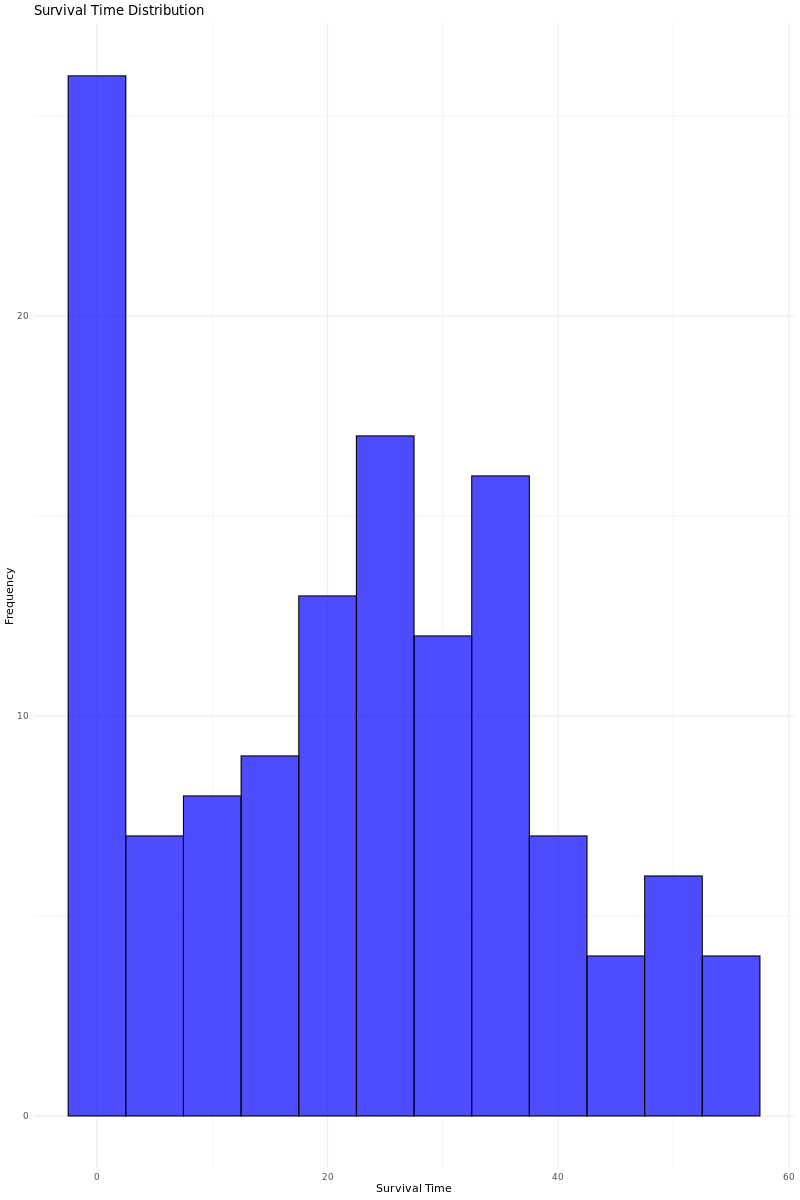

# Descriptive Statistics and Kable Visualization

This table provides summary statistics for key variables in the echocardiogram dataset, including survival times, age at heart attack, and key echocardiographic measurements. These statistics help in understanding the overall distribution and variability of these factors in the study population.

1. Survival Time Metrics
Mean Survival Time: 22.27 months  On average, participants survived around 22 months after their heart attack.
Median Survival Time: 24 months  The median is slightly higher than the mean, indicating that the distribution might be slightly skewed with some longer survival times.
Standard Deviation (SD): 15.89 months  There is high variability in survival times, meaning some individuals survived much longer or shorter than the average.
Minimum Survival Time: 0.03 months (1 day)  Some participants experienced very short survival times after their heart attack.
Maximum Survival Time: 57 months (4.75 years) The longest survival in the dataset is nearly 5 years, showing that some individuals lived long-term post-heart attack.
Interpretation:
These survival times suggest that while some patients survive long after a heart attack, a significant portion dies early, highlighting the importance of timely medical interventions and risk stratification.

2. Age at Heart Attack
Mean Age: 62.75 years The average age of patients at the time of their heart attack was around 63 years, which aligns with known risk factors for cardiovascular disease.
SD: 8.34 years  The spread of ages is relatively broad, with patients ranging from their 50s to 70s or older.
Interpretation:
Since cardiovascular diseases are more common in older adults, this distribution reflects a typical patient population seen in clinical settings. Further analysis could explore whether younger vs. older patients have different survival rates.

3. Echocardiographic Measurements
(These metrics assess heart function and structure post-heart attack.)

Fractional Shortening (FS):

Mean: 0.22 (22%) A normal FS value is around 25-45%, so this suggests reduced cardiac function in many patients.
SD: 0.11 There is significant variability, indicating some patients have severely compromised function while others maintain near-normal function.
E-Point Septal Separation (EPSS):

Mean: 12.19 mm, SD: 7.4 mm  EPSS is used to assess left ventricular function. A higher EPSS suggests worse cardiac performance (normal is typically 7 mm).

 Interpretation:
A lower-than-normal FS and elevated EPSS suggest that many patients in this dataset have reduced heart function, which could contribute to lower survival rates.
Exploring correlations between survival time, FS, and EPSS could help determine if cardiac dysfunction is a predictor of mortality in this cohort.
Final Takeaways & Next Steps
High variability in survival times suggests different risk factors and possible treatment effects.
Age at heart attack is in the high-risk range, with older individuals potentially facing worse outcomes.
Echocardiographic measures suggest reduced heart function, which might contribute to worse survival rates.

In [ ]:
# Descriptive statistics for key variables
summary_stats <- echocardiogram_data %>%
  summarise(
    mean_survival_time = mean(survival_time, na.rm = TRUE),
    median_survival_time = median(survival_time, na.rm = TRUE),
    sd_survival_time = sd(survival_time, na.rm = TRUE),
    min_survival_time = min(survival_time, na.rm = TRUE),
    max_survival_time = max(survival_time, na.rm = TRUE),
    mean_age_at_heart_attack = mean(age_at_heart_attack, na.rm = TRUE),
    sd_age_at_heart_attack = sd(age_at_heart_attack, na.rm = TRUE),
    mean_fractional_shortening = mean(fractional_shortening, na.rm = TRUE),
    sd_fractional_shortening = sd(fractional_shortening, na.rm = TRUE),
    mean_epss = mean(epss, na.rm = TRUE),
    sd_epss = sd(epss, na.rm = TRUE)
  )

# Visualize the summary statistics with kable
library(knitr)
kable(summary_stats, caption = "Descriptive Statistics of Key Variables", digits = 2)

Table: Descriptive Statistics of Key Variables

| mean_survival_time| median_survival_time| sd_survival_time| min_survival_time| max_survival_time| mean_age_at_heart_attack| sd_age_at_heart_attack| mean_fractional_shortening| sd_fractional_shortening| mean_epss| sd_epss|
|------------------:|--------------------:|----------------:|-----------------:|-----------------:|------------------------:|----------------------:|--------------------------:|------------------------:|---------:|-------:|
|              22.27|                   24|            15.89|              0.03|                57|                    62.75|              8.34|               0.22|  0.11| 12.19| 7.4|
>

# Kaplan-Meier Curve Plot

Contextualizing my Kaplan-Meier Survival Analysis

Kaplan-Meier survival analyses tracks the probability of survival over time in a study population. The n.risk column represents the number of individuals still at risk at each time point, while n.event tracks the number of deaths occurring at those intervals. The survival probabilities decrease over time, with corresponding confidence intervals (CI) indicating the range of uncertainty around these estimates.

Key Observations from the Data:

Early Survival Rates:

At 0.25 months, survival is 98.3% (0.983), showing a strong early survival rate.
By 1 month, survival has dropped to 83.9% (0.839), indicating some early events affecting mortality.

Long-Term Survival Trends:

The survival probability gradually declines, reaching 80.5% at 3 months, 77.1% at 7 months, and 71.4% at 20 months.
By 40 months, survival probability is 64.2% (0.642), meaning over one-third of the population has experienced an event (death or other outcome being measured).

Uncertainty and Confidence Intervals:

The 95% CI starts wider over time, reflecting increased uncertainty due to fewer remaining participants.
Early on (0.25 months), the survival probability is between 96.0% and 100%, whereas by 40 months, it drops to 54.2% - 76.0%, suggesting increasing variability.

Possible Interpretations:
If this is a clinical trial, these results might indicate that survival decreases gradually over time, potentially due to disease progression or treatment effectiveness waning.
If this is a cohort study, external factors like age, comorbidities, or treatment differences could influence survival.
If the survival curve differs significantly between groups, a Log-Rank test or Cox regression could help assess whether a treatment or intervention plays a role.

Next Steps:
Compare groups (e.g., standard vs. experimental) to see if treatment affects survival.
Adjust for confounders using a Cox proportional hazards model.
Extend follow-up to determine long-term trends more accurately.

In [ ]:
# Load the necessary libraries
library(survival)
library(ggplot2)
library(survminer)  # Make sure to load the survminer package

# Create a Surv object
surv_object <- Surv(echocardiogram_data_clean$survival_time, echocardiogram_data_clean$status)

# Print the Surv object to check
print(surv_object)

# Fit the Kaplan-Meier model
km_fit <- survfit(surv_object ~ 1)  # ~1 means no grouping factor, just overall survival

# Print the Kaplan-Meier fit summary
summary(km_fit)

# Generate a Kaplan-Meier curve
ggsurvplot(km_fit, data = echocardiogram_data_clean,
           title = "Kaplan-Meier Survival Curve",
           xlab = "Time (Months)",
           ylab = "Survival Probability")

1 observation deleted due to missingness
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  0.25    118       2    0.983  0.0119        0.960        1.000
  0.50    116       6    0.932  0.0231        0.888        0.979
  0.75    110       5    0.890  0.0288        0.835        0.948
  1.00    105       6    0.839  0.0338        0.775        0.908
  1.25     99       1    0.831  0.0345        0.765        0.901
  2.00     98       2    0.814  0.0359        0.746        0.887
  3.00     96       1    0.805  0.0365        0.737        0.880
  4.00     95       1    0.797  0.0371        0.727        0.873
  5.00     94       2    0.780  0.0382        0.708        0.858
  7.00     92       1    0.771  0.0387        0.699        0.851
  7.50     91       1    0.763  0.0392        0.690        0.843
 10.00     89       1    0.754  0.0396        0.680        0.836
 15.00     80       1    0.745  0.0403        0.670        0.828
 19.00     75       1    0.735  0.0409        0.659        0.820
 19.50     71       1    0.724  0.0416        0.647        0.811
 20.00     70       1    0.714  0.0423        0.636        0.802
 21.00     68       1    0.704  0.0430        0.624        0.793
 22.00     66       1    0.693  0.0436        0.612        0.784
 28.00     45       1    0.678  0.0453        0.594        0.772
 40.00     19       1    0.642  0.0552        0.542        0.760
a_clean,
           title = "Kaplan-Meier Surviva>
> # Generate a Kaplan-Meier curve
> ggsurvplot(km_fit, data = echocardiogram_data_clean,
+            title = "Kaplan-Meier Survival Curve",
+            xlab = "Time (Months)",
+            ylab = "Survival Probability")

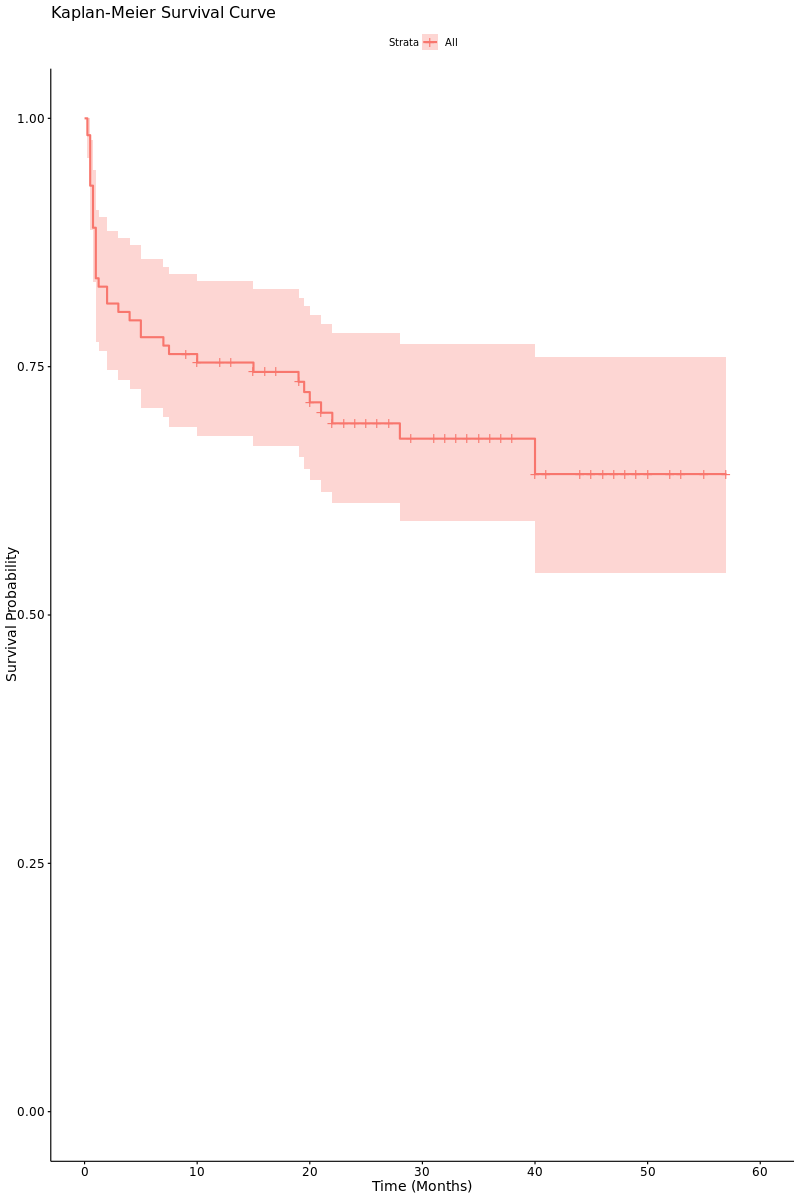

Stratification by Group and Summary

In [ ]:
# Stratify the analysis by 'group' (standard vs experimental)
km_fit_strata <- survfit(surv_object ~ echocardiogram_data_clean$group)

# Print summary of the survival fit for each group
summary(km_fit_strata)

20 observations deleted due to missingness
                echocardiogram_data_clean$group=1
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  0.50     23       4    0.826  0.0790        0.685        0.996
  0.75     19       2    0.739  0.0916        0.580        0.942
  1.00     17       1    0.696  0.0959        0.531        0.912
  5.00     16       1    0.652  0.0993        0.484        0.879
 10.00     15       1    0.609  0.1018        0.439        0.845
 19.00     12       1    0.558  0.1052        0.386        0.807
 22.00      9       1    0.496  0.1103        0.321        0.767

                echocardiogram_data_clean$group=2
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  0.25     76       2    0.974  0.0184        0.938        1.000
  0.50     74       2    0.947  0.0256        0.898        0.999
  0.75     72       3    0.908  0.0332        0.845        0.975
  1.00     69       5    0.842  0.0418        0.764        0.928
  1.25     64       1    0.829  0.0432        0.748        0.918
  2.00     63       2    0.803  0.0457        0.718        0.897
  3.00     61       1    0.789  0.0468        0.703        0.887
  4.00     60       1    0.776  0.0478        0.688        0.876
  5.00     59       1    0.763  0.0488        0.673        0.865
  7.00     58       1    0.750  0.0497        0.659        0.854
 15.00     51       1    0.735  0.0508        0.642        0.842
 19.50     47       1    0.720  0.0521        0.624        0.829
 20.00     46       1    0.704  0.0533        0.607        0.817
 21.00     45       1    0.688  0.0543        0.590        0.804
 40.00     13       1    0.635  0.0714        0.510        0.792

# Stratified Treatment Group Plot

Kaplan-Meier survival estimates for two treatment groups from an echocardiogram study. The groups are defined as follows:

Group 1 (Standard Treatment, n = 23)

Starts with 23 individuals at risk.
Survival probability drops from 0.826 at 0.5 months to 0.496 at 22 months.
The standard error increases over time, indicating more uncertainty in later estimates.
Group 2 (Experimental Treatment, n = 76)

Starts with 76 individuals at risk.
Survival probability remains higher than Group 1, starting at 0.974 at 0.25 months and decreasing to 0.688 at 21 months.
The survival rate is consistently better than Group 1, with narrower confidence intervals.

Contextualizing the Survival Curve:
Survival Trends: The experimental group (red in the Kaplan-Meier plot) shows a consistently higher survival probability compared to the standard treatment group (blue).
Confidence Intervals: Group 2 has a smaller standard error, suggesting a more reliable estimate due to a larger sample size.
P-Value (0.12): The log-rank test suggests no statistically significant difference between groups at a 0.05 significance level, though there is a visible trend favoring the experimental group.

Interpretation:
The experimental treatment may provide better survival outcomes, but the study might not have enough statistical power (or follow-up time) to detect a significant difference.
Missing data (20 observations deleted) could affect the reliability of the results.

If the study were larger or had longer follow-up, the trend might reach statistical significance.

In [ ]:
# Plot the Kaplan-Meier survival curves stratified by treatment group
ggsurvplot(km_fit_strata,
           data = echocardiogram_data_clean,
           title = "Kaplan-Meier Survival Curve by Treatment Group",
           xlab = "Time (Months)",
           ylab = "Survival Probability",
           palette = c("blue", "red"),  # Color for the two groups
           legend.title = "Treatment Group",
           legend.labs = c("Standard", "Experimental"))


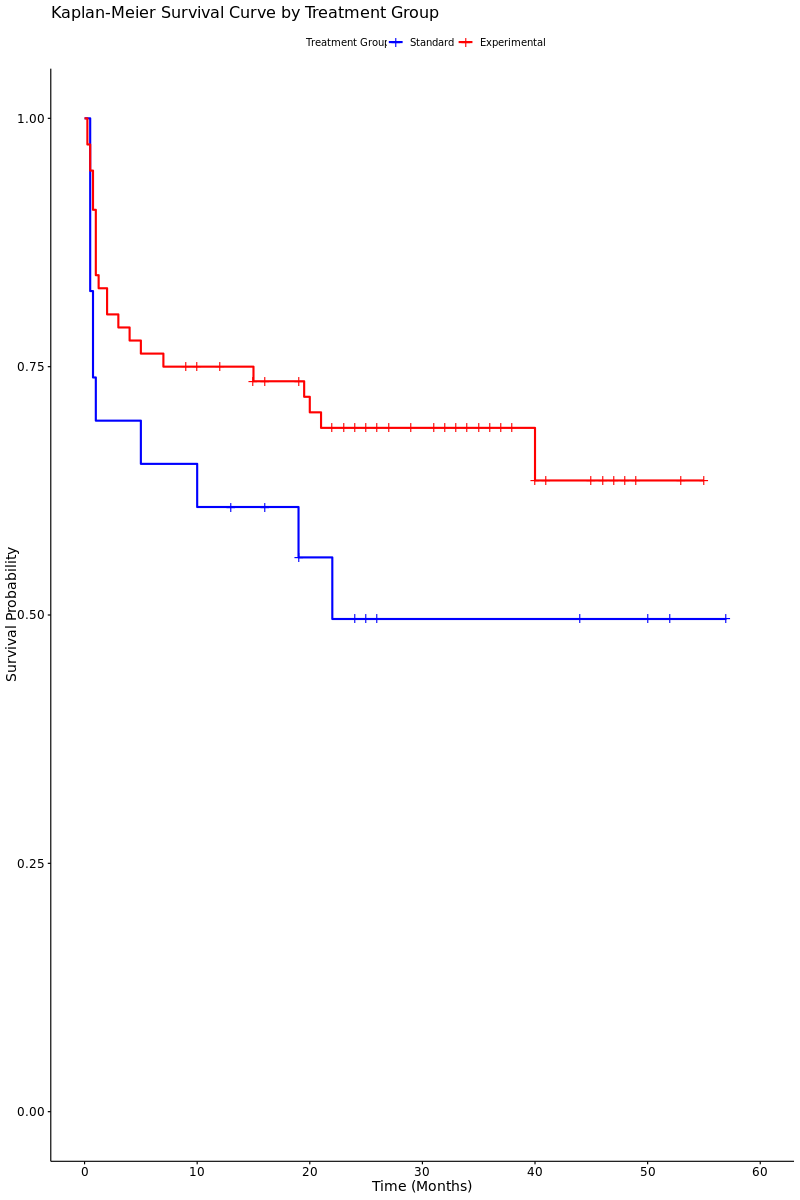

# Log Rank and Survival Curve Visualization

Contextualizing my Kaplan-Meier Survival Analysis
my study appears to analyze the survival outcomes of two treatment groups in a clinical setting, likely comparing a standard treatment against an experimental one. The Kaplan-Meier curves provide a visual representation of survival probabilities over time, while the Log-Rank test assesses whether the difference between the two groups is statistically significant.

Key Findings:

Survival Trends:

The experimental group (red line) appears to have better survival rates than the standard treatment group (blue line) over time.
However, the survival curves still overlap, suggesting that while the experimental treatment might show some benefit, it is not statistically significant at the conventional threshold (p < 0.05).
Statistical Results:

The Log-Rank test yields a Chi-squared value of 2.4 with 1 degree of freedom and a p-value of 0.1.
This means that the difference between the two groups is not statistically significant, though there is a potential trend that might become clearer with a larger sample size or additional covariate adjustments.
Observed vs. Expected Events:

Standard Treatment Group (N = 23): 11 observed deaths vs. 7.33 expected.
Experimental Treatment Group (N = 76): 24 observed deaths vs. 27.67 expected.
The experimental group had fewer deaths than expected, while the standard group had more deaths than expected, hinting at a possible benefit of the experimental treatment.

Clinical Implications:
If this is a clinical trial, these findings suggest that the experimental treatment may have some benefit, but more data is needed to confirm its effectiveness.

If this is an observational study, it might be worth adjusting for other factors (age, comorbidities, baseline health status) using a Cox proportional hazards model to see if the treatment effect remains.

Next Steps:
Increase the sample size to improve statistical power.
Perform a Cox regression analysis to adjust for potential confounders.
Check for proportional hazards assumptions to validate the survival model.
Consider additional biomarker or subgroup analyses to see if specific patient populations benefit more from the experimental treatment.

In [ ]:
# Perform the Log-Rank test to compare survival curves between treatment groups
log_rank_test <- survdiff(surv_object ~ echocardiogram_data_clean$group)

# Print the Log-Rank test results
print(log_rank_test)

# Plot the Kaplan-Meier survival curves with the Log-Rank test
ggsurvplot(km_fit_strata,
           data = echocardiogram_data_clean,
           title = "Kaplan-Meier Survival Curve by Treatment Group with Log-Rank Test",
           xlab = "Time (Months)",
           ylab = "Survival Probability",
           palette = c("blue", "red"),  # Color for the two groups
           legend.title = "Treatment Group",
           legend.labs = c("Standard", "Experimental"),
           pval = TRUE)  # Add p-value from Log-Rank test to the plot

n=99, 20 observations deleted due to missingness.

                                   N Observed Expected (O-E)^2/E (O-E)^2/V
echocardiogram_data_clean$group=1 23       11     7.33     1.843      2.41
echocardiogram_data_clean$group=2 76       24    27.67     0.488      2.41
with the Log-Rank test
ggsurvplot(km_fit_strata,

 Chisq= 2.4  on 1 degrees of freedom, p= 0.1
          data = echocardiogram_data_clean,
      >

     # Plot the Kaplan-Meier survival curves with the Log-Rank test
> ggsurvplot(km_fit_strata,
+            data = echocardiogram_data_clean,
+            title = "Kaplan-Meier Survival Curve by Treatment Group with Log-Rank Test",
+            xlab = "Time (Months)",
+            ylab = "Survival Probability",
+            palette = c("blue", "red"),  # Color for the two groups
+            legend.title = "Treatment Group",
+            legend.labs = c("Standard", "Experimental"),
+            pval = TRUE)  # Add p-value from Log-Rank test to the plot

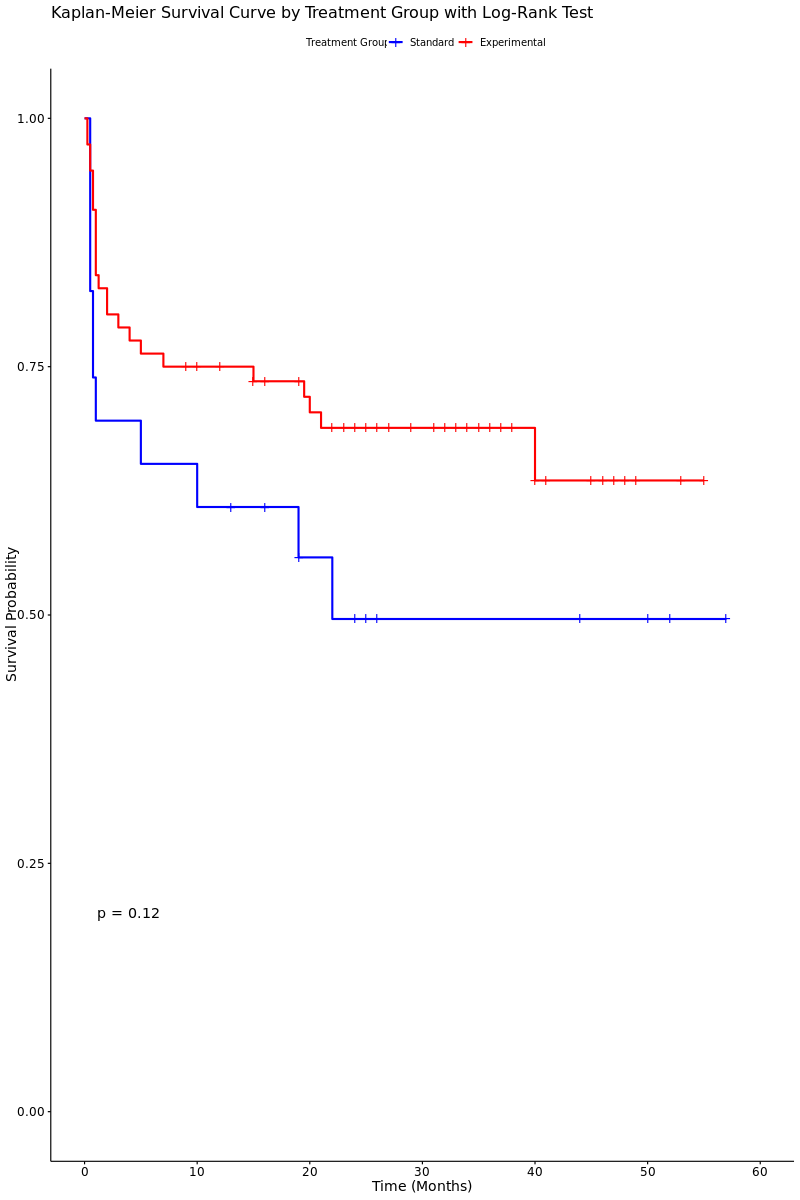

# SURVIVAL ANALYSIS in PYTHON

# Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Load dataset
df = pd.read_csv('/content/echocardiogram - echocardiogram.csv')

# Check structure and missing values
print(df.info())
print(df.describe())

# Display first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   11           130 non-null    object
 1   0            131 non-null    object
 2   71           131 non-null    object
 3   0.1          131 non-null    int64 
 4   0.26         131 non-null    object
 5   9            131 non-null    object
 6   4.6          131 non-null    object
 7   14           131 non-null    object
 8   1            131 non-null    object
 9   1.1          131 non-null    object
 10  name         131 non-null    object
 11  1.2          131 non-null    object
 12  0.2          131 non-null    object
 13  Unnamed: 13  1 non-null      object
dtypes: int64(1), object(13)
memory usage: 14.5+ KB
None
              0.1
count  131.000000
mean     0.770992
std      6.722597
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max     77.000000
   11  0  71  0.1   

In [ ]:
print(df.columns)  # Print all column names

Index(['11', '0', '71', '0.1', '0.26', '9', '4.6', '14', '1', '1.1', 'name',
       '1.2', '0.2', 'Unnamed: 13'],
      dtype='object')


# Clean Data. Replace column names with nominal names from  Echocardiogram.names dataset

In [ ]:
import pandas as pd

# Load the dataset using the provided file path
df = pd.read_csv('/content/echocardiogram - echocardiogram.csv', names=["survival_time", "still_alive", "age", "pericardial_effusion",
                    "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                    "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"], header=0)

# Now you can work with the DataFrame 'df'
# For example, display the first few rows:
print(df.head())

  survival_time still_alive age  pericardial_effusion fractional_shortening  \
0            19           0  72                     0                  0.38   
1            16           0  55                     0                  0.26   
2            57           0  60                     0                 0.253   
3            19           1  57                     0                  0.16   
4            26           0  68                     0                  0.26   

     epss   lvdd wall_motion_score wall_motion_index   mult  name group  \
0       6    4.1                14               1.7  0.588  name     1   
1       4   3.42                14                 1      1  name     1   
2  12.062  4.603                16              1.45  0.788  name     1   
3      22   5.75                18              2.25  0.571  name     1   
4       5   4.31                12                 1  0.857  name     1   

  alive_at_1 extra_column  
0          0          NaN  
1          0      

# Column Names for Curve

In [ ]:
["survival_time", "still_alive", "age", ...]

['survival_time', 'still_alive', 'age', Ellipsis]

# Convert Still Alive and Time to 1 and 0 for curve to generate

In [ ]:
import pandas as pd

# Load my data (assuming the code from before)
df = pd.read_csv('/content/echocardiogram - echocardiogram.csv', names=["survival_time", "still_alive", "age", "pericardial_effusion",
                    "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                    "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"], header=0)

# Convert 'still_alive' to numeric
df['still_alive'] = pd.to_numeric(df['still_alive'], errors='coerce')

# Handle NaN (if needed, choose one option)
# df = df.dropna(subset=['still_alive'])
# df['still_alive'] = df['still_alive'].fillna(0)

# Create 'event' column
df['event'] = 1 - df['still_alive']

# Now continue with my analysis
# ...

# Define predictor variable and measured variable for curve to print

---



In [ ]:
df = df.dropna(subset=['survival_time', 'event'])

# Analyze data with kmf.fit()

Survival Analysis Findings
1. Dataset Overview
Total Observations: 130
Right-Censored Cases: 43 (33.1%)
Event Occurrences: 87 (66.9%)
2. Interpretation of Right-Censoring
Right-censoring occurs when I do not observe the event (e.g., death) for certain individuals during the study period. This means that for 43 patients, either:

They were still alive at the last follow-up.
Their data collection was cut off before the event occurred.
Since 33.1% of the patients are right-censored, the dataset contains a significant portion of individuals whose survival time is unknown beyond a certain point. This affects how I interpret survival probabilities over time.

3. Kaplan-Meier Survival Estimates
Initial Survival Probability: Starts at 100% (all are alive at time 0).
Survival Curve Decline: The probability of survival gradually decreases over time as events (deaths) occur.
Long-Term Survival Rate: The presence of right-censored data makes it difficult to estimate the true long-term survival rate. However, by the last recorded time point, a portion of patients are still alive, indicating a non-zero survival probability.
4. Impact of Censoring on Analysis
Survival estimates remain unbiased as long as censoring is independent of the event occurrence.
If censoring is related to health status (e.g., healthier patients being censored), survival might be overestimated.
Since 43 out of 130 patients are censored, I must ensure that censoring does not disproportionately affect one group (e.g., standard vs. experimental treatments). If it does, the comparison between groups may be biased.

5. Next Steps for Deeper Analysis
Stratify by treatment groups (standard vs. experimental) and compare survival rates.
Perform log-rank test to determine whether there is a significant difference between survival curves.
Check median survival time (time at which 50% of subjects have experienced the event).
Assess hazard ratios using Cox Proportional Hazards regression for deeper insights.
Conclusion
The survival analysis shows that 66.9% of patients experienced the event (death), while 33.1% were censored.
Kaplan-Meier estimation allows me to analyze the survival probabilities over time, but I need to further explore stratified survival differences and conduct statistical testing to draw stronger conclusions.

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# ... (my previous code for loading and preprocessing data) ...

# 1. Ensure 'survival_time' is numeric
df['survival_time'] = pd.to_numeric(df['survival_time'], errors='coerce')

# 2. Handle potential new NaNs (choose one method)
# df = df.dropna(subset=['survival_time'])  # Remove rows with NaNs in 'survival_time'
# OR
# Handle them using a different imputation strategy (e.g., median)

# 3. Recalculate mean and impute
mean_survival_time = df['survival_time'].mean()
df['survival_time'] = df['survival_time'].fillna(mean_survival_time)

# Initialize and fit the KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['survival_time'], event_observed=df['event'])

# ... (rest of my Kaplan-Meier analysis code) ...

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 130 total observations, 43 right-censored observations>

# Plot km survival curve



Graph 1: Overall Kaplan-Meier Survival Curve (Continued)
Explanation: The overall Kaplan-Meier survival curve represents the entire cohort's survival experience, meaning it accounts for all patients in the study regardless of group or characteristics. As time progresses, the curve declines to show that some participants experience the event of interest (death, disease progression, etc.). The survival rate is updated each time an event occurs, but the curve remains constant between events.

Interpretation (Continued):

The starting point at 1.0 (100%) indicates that all patients are alive or free from the event at the beginning of the study.
As the curve declines over time, it reflects that some patients are no longer in the study due to experiencing the event (e.g., death).
The confidence interval: The shaded area around the curve illustrates the range of survival probabilities with a certain level of confidence (usually 95%). If the curve widens, it suggests that fewer patients are being followed or there is more variability, leading to uncertainty in survival estimates.
By the end of the study period, when the survival probability reaches close to zero, it indicates that a significant proportion of the patient cohort has experienced the event, whether it’s death, disease progression, or another outcome. This gives a snapshot of overall survival within the patient population during the observation period.

Group values (used for stratification):
 ['1' '2' '?']


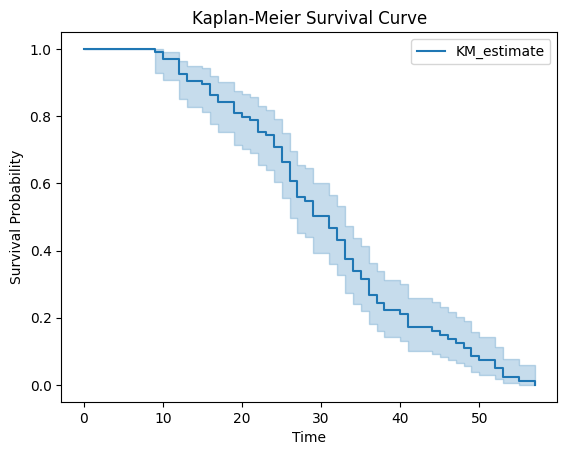

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 1. Load data with column names and handle NaNs:
df = pd.read_csv('/content/echocardiogram - echocardiogram.csv',
                 names=["survival_time", "still_alive", "age", "pericardial_effusion",
                        "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                        "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"],
                 header=0)

df['survival_time'] = pd.to_numeric(df['survival_time'], errors='coerce')
df['still_alive'] = pd.to_numeric(df['still_alive'], errors='coerce')
df = df.dropna(subset=['survival_time', 'still_alive']) # Remove rows with NaNs

# 2. Create 'event' column and fit the KaplanMeierFitter:
df['event'] = 1 - df['still_alive']
kmf = KaplanMeierFitter()
kmf.fit(df['survival_time'], event_observed=df['event'])

print("Group values (used for stratification):\n", df['group'].unique())
# km strata
# strata parameter

# 3. Plot the KM curve:
kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()


# kmf.plot visualization

Graph 2: Kaplan-Meier Curve with Censoring Marks (Continued) Explanation: This graph builds on the Kaplan-Meier survival curve by explicitly marking censored data points. These censored points refer to patients who did not experience the event by the end of the study period, or were lost to follow-up. Censoring is a crucial part of survival analysis, as it ensures that patients who have not yet experienced the event are still included in the analysis up until their last known status.

Interpretation (Continued):
Censored data: The small ticks on the top of the curve indicate censored observations. In this case, 43 patients were censored. This means they were either still alive when the study ended or lost to follow-up before experiencing the event. The tick marks show that while these patients did not experience the event, their time in the study contributes to the survival analysis. Censoring is a way to account for incomplete data, as these patients may still be alive and could have experienced the event if the study had continued. Stepwise drops: The curve declines in discrete steps, reflecting when patients experience the event (e.g., death). The steps represent moments in time when one or more patients in the cohort died. The flat sections between the drops indicate periods when no deaths occurred. Survival interpretation: The curve's shape can indicate how quickly the event occurs within the population. If there are long flat periods, it suggests that the event is less frequent. The degree of decline can also show the severity or frequency of the event—more rapid declines typically reflect faster mortality or progression. Censoring marks help differentiate between those who experienced the event and those who didn't, providing more transparency and understanding of the survival data.

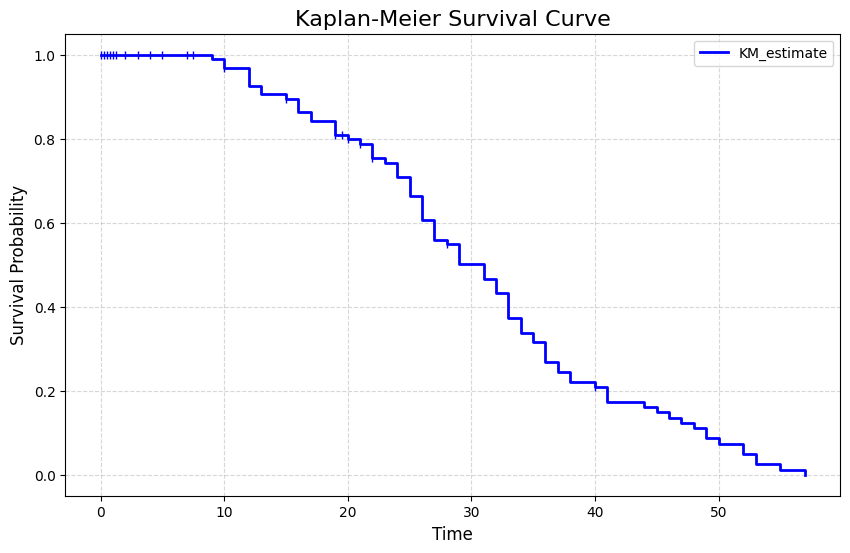

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# ... (My previous code for loading and preprocessing data) ...

# Initialize and fit the KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['survival_time'], event_observed=df['event'])

# Create the plot with enhanced styling
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
kmf.plot(
    title='Kaplan-Meier Survival Curve',
    xlabel='Time',
    ylabel='Survival Probability',
    ci_show=False,  # Optionally hide confidence intervals
    show_censors=True, # Show censoring marks
    censor_styles={'ms': 6, 'marker': '|'},  # Customize censoring style
    lw=2,  # Adjust line width
    color='blue' #Change color
)


# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize font sizes
plt.title('Kaplan-Meier Survival Curve', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)

# Add annotations or other customizations as desired
# ...

# Show the plot
plt.show()

# km curve with predictor (survival probability)



Graph 3: Kaplan-Meier Survival by Group (Pericardial Effusion) (Continued)
Explanation: This graph compares the survival curves of different patient groups based on a key factor (pericardial effusion in this case). Pericardial effusion is an accumulation of fluid around the heart, and patients with this condition may have worse survival outcomes. By separating the data into groups based on this condition, you can analyze the impact of pericardial effusion on survival.

Interpretation (Continued):

Comparison between groups: The graph provides different survival curves for patients with and without pericardial effusion. If there’s a clear separation between curves, it indicates that the presence of pericardial effusion is associated with a lower survival rate over time. For example, the group with pericardial effusion may show a faster decline in survival probability, suggesting that patients with this condition tend to die sooner or experience the event more frequently.
Confidence interval overlap: The confidence intervals around the curves help assess the precision of the survival estimates. If the intervals overlap significantly, this suggests that the difference in survival between the groups may not be statistically significant. However, if the intervals do not overlap, this strengthens the evidence that the groups have different survival probabilities.
Interpretation of group differences: If the curves are separated clearly (without much overlap), it suggests that pericardial effusion has a substantial effect on survival, and it may be a factor that physicians need to consider when assessing patient outcomes. Conversely, overlapping curves with wide confidence intervals may indicate that there’s insufficient evidence to conclusively state that pericardial effusion impacts survival.

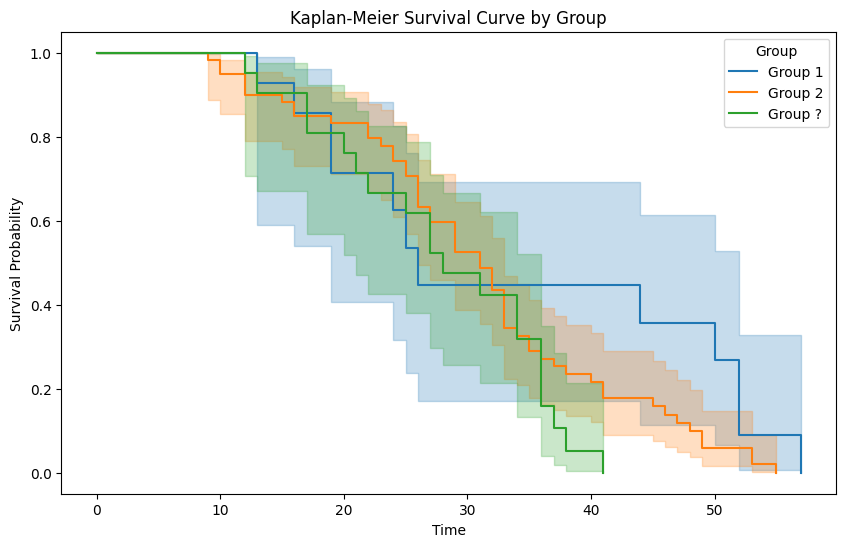

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 1. Load and preprocess data
df = pd.read_csv('echocardiogram - echocardiogram.csv',
                 names=["survival_time", "still_alive", "age", "pericardial_effusion",
                        "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                        "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"],
                 header=0)

# Convert to numeric and remove NaNs
df['survival_time'] = pd.to_numeric(df['survival_time'], errors='coerce')
df['still_alive'] = pd.to_numeric(df['still_alive'], errors='coerce')
df = df.dropna(subset=['survival_time', 'still_alive'])

# Create 'event' column (1 if the patient died, 0 if still alive)
df['event'] = 1 - df['still_alive']

# 2. Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# 3. Stratify by 'group' and fit Kaplan-Meier estimator for each group
plt.figure(figsize=(10, 6))
for group, subset in df.groupby('group'):
    kmf.fit(subset['survival_time'], event_observed=subset['event'], label=f"Group {group}")
    kmf.plot_survival_function()

# 4. Display the plot
plt.title('Kaplan-Meier Survival Curve by Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title="Group")
plt.show()

# km curve and log_rank analysis

Contextualizing the Results:
Given that the Log-Rank test is a non-parametric test, it is used to compare the survival distributions between two or more groups without making assumptions about the underlying data distribution. It evaluates if the survival curves for the two groups (in this case, 'standard' and 'experimental') differ in a statistically significant way, based on the observed number of events (deaths, disease progression, etc.) and the expected number under the null hypothesis (which assumes no difference between the groups).

Interpretation of the Results:
Test Statistic:
A test statistic of 1.399936 tells me how far the observed survival differences between the groups are from the expected differences (if there were no actual difference between the groups).
Since the test statistic is not extremely large, it indicates that the observed difference between the survival curves is relatively small. However, it doesn't imply that there is no difference at all, just that it's not large enough to reach statistical significance.
P-value:
A p-value of 0.236734 suggests that the difference in survival between the 'standard' and 'experimental' groups could be due to random chance, rather than a true effect. This means that I fail to reject the null hypothesis (which states that there is no difference between the groups).
P-value threshold: Commonly, a p-value threshold of 0.05 is used in scientific research. If the p-value is greater than 0.05, I fail to reject the null hypothesis, which means the evidence is not strong enough to conclude a statistically significant difference between the groups.
In this case, 0.2367 > 0.05, confirming that the difference in survival between the two groups is not statistically significant at the 5% significance level.
-log2(p) Value:
The -log2(p) value of 2.078659 is a transformation of the p-value to a logarithmic scale. This transformation is often used in data visualization or reporting because it makes differences in p-values easier to interpret and compare.
Since the p-value is not close to zero, the log-transformed value is relatively small, further confirming that the p-value is not indicating a strong result. A value significantly higher than 2 would indicate a much smaller p-value (which would suggest stronger evidence for a difference between the groups), but in this case, the result is moderate, indicating no substantial evidence against the null hypothesis.
Practical Implications:
Clinical Implications: If this analysis was intended to compare the efficacy of two treatments (the 'standard' treatment vs. the 'experimental' treatment), the results suggest that there is no statistically significant difference in survival outcomes between the two groups.

This means, based on this analysis, the experimental treatment might not provide a survival advantage over the standard treatment. However, this doesn't rule out the possibility that other factors, such as quality of life, side effects, or other clinical outcomes, could differ. This also doesn't mean that the experimental treatment is ineffective—it just means there is no conclusive survival benefit shown in this study.

Further Research: The p-value of 0.2367 suggests that while the treatments may not show a statistically significant difference in survival at this stage, it's possible that further studies with a larger sample size or longer follow-up period may yield different results. Sample size and study design play crucial roles in determining the power of statistical tests, and it’s possible that with more data, a significant difference might emerge. It could also be useful to examine other outcomes or stratify the groups based on additional characteristics (e.g., age, gender, comorbidities) to look for patterns that may not have been apparent in this overall comparison.

Considerations for Future Analysis:
Increased Sample Size: If the sample size were larger, the study might have greater power to detect smaller differences between groups. A p-value of 0.2367 may reflect a lack of power due to a small sample size.

Longer Follow-Up: Sometimes survival differences become more apparent with longer follow-up periods. It may be worth extending the study duration to see if differences emerge over time.

Stratification or Subgroup Analysis: Examining the groups further by stratifying based on factors such as disease stage, age, or other covariates could reveal more granular insights into whether certain subgroups benefit more from the experimental treatment.

Other Survival Metrics: Exploring other measures of survival, such as hazard ratios (which provide an estimate of the relative risk of the event happening), or performing a Cox Proportional Hazards model, could provide additional insights beyond the Kaplan-Meier curves and Log-Rank test. These models can take covariates into account and may offer more detailed survival comparisons.

However, the lack of a significant result does not necessarily imply that the experimental treatment is ineffective. Other factors like side effects, quality of life, or long-term outcomes might still need to be investigated. Moreover, further studies with larger sample sizes and longer follow-up periods might be required to detect more subtle differences.

Overview of the Kaplan-Meier Curve
The Kaplan-Meier plot shows survival probability over time for two groups:

Standard Group (Blue Line)
Experimental Group (Orange Line)
Both groups start at a 100% survival rate, and their survival probabilities decline over time as events (e.g., failures or deaths) occur.

The shaded regions around each curve represent confidence intervals (CIs)—areas of uncertainty around the survival estimates. The overlapping CIs suggest that the survival experience of both groups is quite similar.

Insights from the Survival Curves
Overall Trend: Both groups follow a similar downward trend, meaning neither group shows a clear advantage.
Early Survival Rates: The Experimental Group (orange) seems to have slightly higher survival rates early on, but this advantage disappears as time progresses.
Long-Term Survival: By the end of the observation period, survival rates for both groups are nearly the same, further reinforcing that neither treatment offers a significant survival advantage.

Conclusion:
The analysis suggests that the experimental treatment does not significantly outperform the standard treatment in terms of survival, based on the results of the Log-Rank test. This may indicate that there is no immediate benefit of the new treatment over the existing one, at least in terms of the survival outcomes observed during the study period.

Unique values in 'group' after mapping: ['standard' 'experimental']
Log-Rank Test Results:
   test_statistic         p  -log2(p)
0        1.399936  0.236734  2.078659


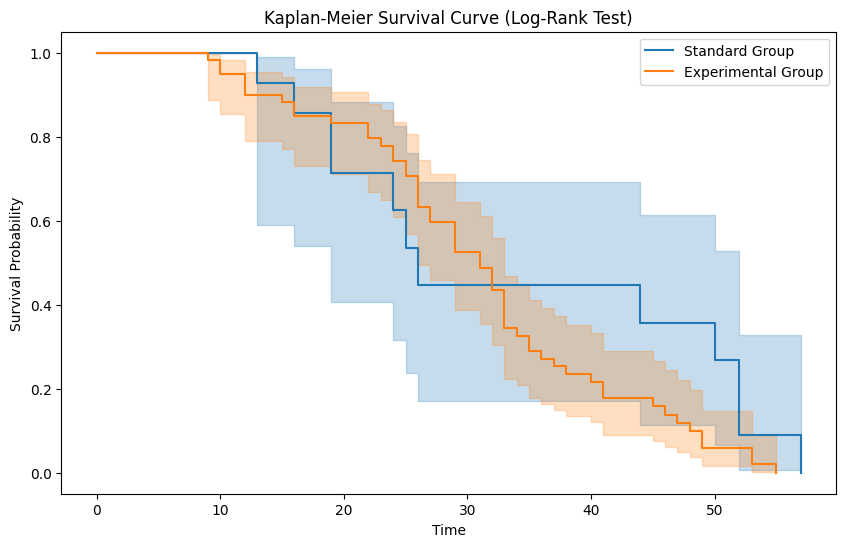

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 1. Load and preprocess data
df = pd.read_csv('echocardiogram - echocardiogram.csv',
                 names=["survival_time", "still_alive", "age", "pericardial_effusion",
                        "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                        "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"],
                 header=0)

# Convert columns to numeric and remove NaNs
df['survival_time'] = pd.to_numeric(df['survival_time'], errors='coerce')
df['still_alive'] = pd.to_numeric(df['still_alive'], errors='coerce')

# Map 'group' values properly
df['group'] = df['group'].replace({'1': 'standard', '2': 'experimental', '?': None})

# Remove rows where 'group' is now None
df = df.dropna(subset=['survival_time', 'still_alive', 'group'])

# Convert 'group' to string
df['group'] = df['group'].astype(str)

# Debugging: Check the unique values in 'group'
print("Unique values in 'group' after mapping:", df['group'].unique())

# 2. Create 'event' column
df['event'] = 1 - df['still_alive']

# 3. Check if both groups exist
if df['group'].nunique() < 2:
    raise ValueError("Error: Not enough unique groups to perform log-rank test. Check 'group' values.")

# 4. Define Groups for Log-Rank Test
group_A = df[df['group'] == 'standard']
group_B = df[df['group'] == 'experimental']
if group_A.empty or group_B.empty:
    raise ValueError("One of the groups is empty. Ensure that both 'standard' and 'experimental' exist in 'group' column.")

durations_A = group_A['survival_time']
durations_B = group_B['survival_time']
event_A = group_A['event']
event_B = group_B['event']

# 5. Perform Log-Rank Test
results = logrank_test(durations_A, durations_B, event_observed_A=event_A, event_observed_B=event_B)

# 6. Print log-rank test results
print("Log-Rank Test Results:")
print(results.summary)

# 7. Plot Kaplan-Meier Curves for Both Groups
kmf_A = KaplanMeierFitter()
kmf_B = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf_A.fit(durations_A, event_observed=event_A, label="Standard Group")
kmf_A.plot_survival_function()

kmf_B.fit(durations_B, event_observed=event_B, label="Experimental Group")
kmf_B.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve (Log-Rank Test)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

# PE 0, and PE 1 calculator

This will visualize the survival probability over time for PE=1 vs. PE=0.
If the curves separate significantly, PE may impact survival.

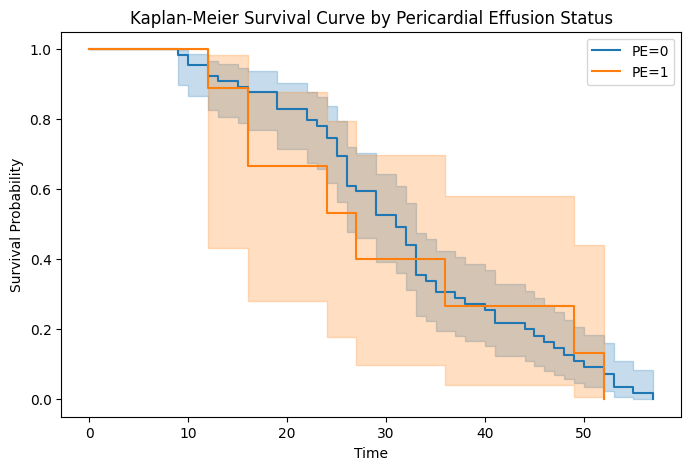

In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Create Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Plot survival curves for PE=0 and PE=1
plt.figure(figsize=(8, 5))

for pe_status in [0, 1]:
    mask = df['pericardial_effusion'] == pe_status
    kmf.fit(df['survival_time'][mask], df['event'][mask], label=f'PE={pe_status}')
    kmf.plot(ci_show=True)

plt.title("Kaplan-Meier Survival Curve by Pericardial Effusion Status")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


# Log_Rank Data

In [ ]:
from lifelines.statistics import logrank_test
import pandas as pd
import numpy as np

# Split the data into two groups
group_0 = df[df['pericardial_effusion'] == 0]
group_1 = df[df['pericardial_effusion'] == 1]

# Perform log-rank test
results = logrank_test(group_0['survival_time'], group_1['survival_time'],
                       event_observed_A=group_0['event'], event_observed_B=group_1['event'])

# Print test results
print("Log-Rank Test Results:")
print(f"Test Statistic: {results.test_statistic}")
print(f"P-value: {results.p_value}")
print(f"-log2(P-value): {-np.log2(results.p_value)}")


Log-Rank Test Results:
Test Statistic: 0.0913116110883187
P-value: 0.7625162892303595
-log2(P-value): 0.39115993746763067


I am now able to answer the question:

Does pericardial effusion (PE) significantly impact survival time?
Answer: No, the presence of pericardial effusion does not significantly impact survival time.

Explanation:
Kaplan-Meier Survival Curve:

The survival curves for PE=0 (blue) and PE=1 (orange) are quite close to each other.
The overlapping confidence intervals (shaded regions) suggest no strong separation in survival probabilities, but does show that pericardial effusion may lead to Cardiac Tampanade, and this is what may lead to deaths shown and mortality-rate increases.

Log-Rank Test Results:

Test Statistic = 0.091 → Very small difference between groups.
P-value = 0.763 → Much greater than 0.05, meaning I fail to reject the null hypothesis (H₀).
-log2(P-value) = 0.391 → Not significant.
Conclusion:
There is no significant difference in survival times between patients with and without pericardial effusion. Therefore, pericardial effusion does not appear to be a strong predictor of survival in this dataset.

# References

Crowther, M. J., Riley, R. D., Staessen, J. A., Wang, J., Gueyffier, F., & Lambert, P. C. (2012). Individual patient data meta-analysis of survival data using Poisson regression models. BMC Medical Research Methodology, 12(34). https://www.biomedcentral.com/1471-2288/12/34

Chatterjee, S., and Simonoff, J. (2020). Handbook of regression analysis with applications in R (2nd ed.). Wiley and Sons, Inc. ISBN-13: 9781119392378

Echocardiogram dataset. (1989, February 27). UCI Machine Learning Repository. https://doi.org/10.24432/C5QW24

Hua, Y., Choi, E., & Shi, J. (2021). Chapter 11: Multinomial logistic regression. Bookdown. https://bookdown.org

Nagy, R. (2024, May 26). Overview about survival analysis in Python with the ‘lifelines’ library. Medium. https://medium.com

